In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()
#head gives us the first 5 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe()
#descriptive analytic - gives us a numerical summary for anything numerical

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

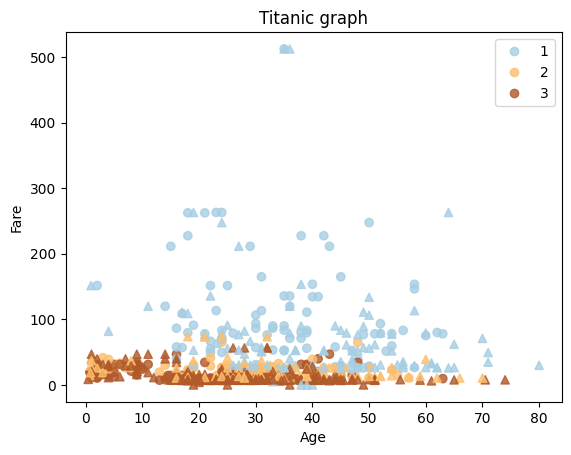

In [4]:
titanic_notna = titanic[titanic['age'].notna()]
#running script to keep only data that contains a value in the age column (dropping all observations that does not have age)

female = titanic_notna[titanic_notna['sex'] == 'female']
male = titanic_notna[titanic_notna['sex'] == 'male']
#splitting new dataframe into male and female

fig, ax = plt.subplots()
#setting up a plot

scatter_f = ax.scatter('age', 'fare', marker = 'o', c = 'pclass',
                       label = 'female', cmap = 'Paired', alpha = .8,
                       data = female)
#setting up a scatter plot X is the age and Y is the fare for female scatter
scatter_m = ax.scatter('age', 'fare', marker = '^', c = 'pclass',
                       label = 'male', cmap = 'Paired', alpha = .8,
                       data = male)
#setting up a scatter plot X is the age and Y is the fare for female scatter

plt.title('Titanic graph')
#naming viz

ax.set(xlabel = 'Age', ylabel = 'Fare')
#naming the axis's

ax.legend(*scatter_f.legend_elements())
#adds a legend
plt.show
#shows/prints the plot

<function matplotlib.pyplot.show(close=None, block=None)>

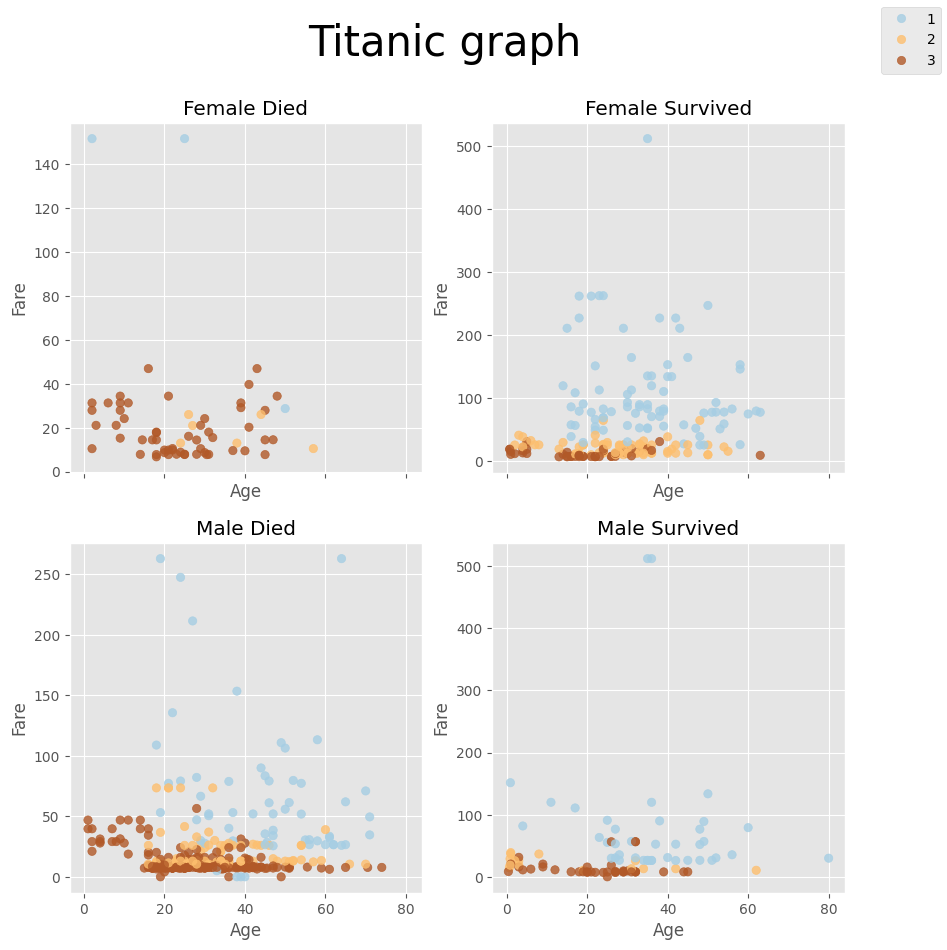

In [5]:
plt.style.use('ggplot')
#changes style of plot

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, sharex=True, figsize=(10, 10))

scatter_fs = ax1.scatter('age', 'fare', c = 'pclass',
                       label = 'female', cmap = 'Paired', alpha = .8,
                       data = female[female['survived'] == 0])
#the 0 is the subset that indicates t
scatter_fd = ax2.scatter('age', 'fare', c = 'pclass',
                       label = 'female', cmap = 'Paired', alpha = .8,
                       data = female[female['survived'] == 1])

scatter_ms = ax3.scatter('age', 'fare', c = 'pclass',
                       label = 'male', cmap = 'Paired', alpha = .8,
                       data = male[male['survived'] == 0])

scatter_md = ax4.scatter('age', 'fare', c = 'pclass',
                       label = 'male', cmap = 'Paired', alpha = .8,
                       data = male[male['survived'] == 1])

plt.suptitle('Titanic graph', fontsize=30)

ax1.set(xlabel='Age', ylabel='Fare', title='Female Died')
ax2.set(xlabel='Age', ylabel='Fare', title='Female Survived')
ax3.set(xlabel='Age', ylabel='Fare', title='Male Died')
ax4.set(xlabel='Age', ylabel='Fare', title='Male Survived')

fig.legend(*scatter_fs.legend_elements())
plt.show

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
features = ['age', 'fare', 'pclass'] #listing the features I want to select
target = 'survived' # taret variable

titanic = pd.concat([male, female], axis = 0)

titanic = titanic.dropna(subset = features + [target])

x = titanic[features]
y = titanic[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42) #pliting into training and testing sets

In [8]:
model = RandomForestClassifier(n_estimators= 100, random_state= 42) #Traning the model
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(x_test) # making prediction on the test set

accuracy = accuracy_score(y_test, y_pred) # evaluating the model
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy: .2f}")
print("Classification Report:\n", report)

Accuracy:  0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       131
           1       0.64      0.56      0.59        84

    accuracy                           0.70       215
   macro avg       0.69      0.68      0.68       215
weighted avg       0.70      0.70      0.70       215



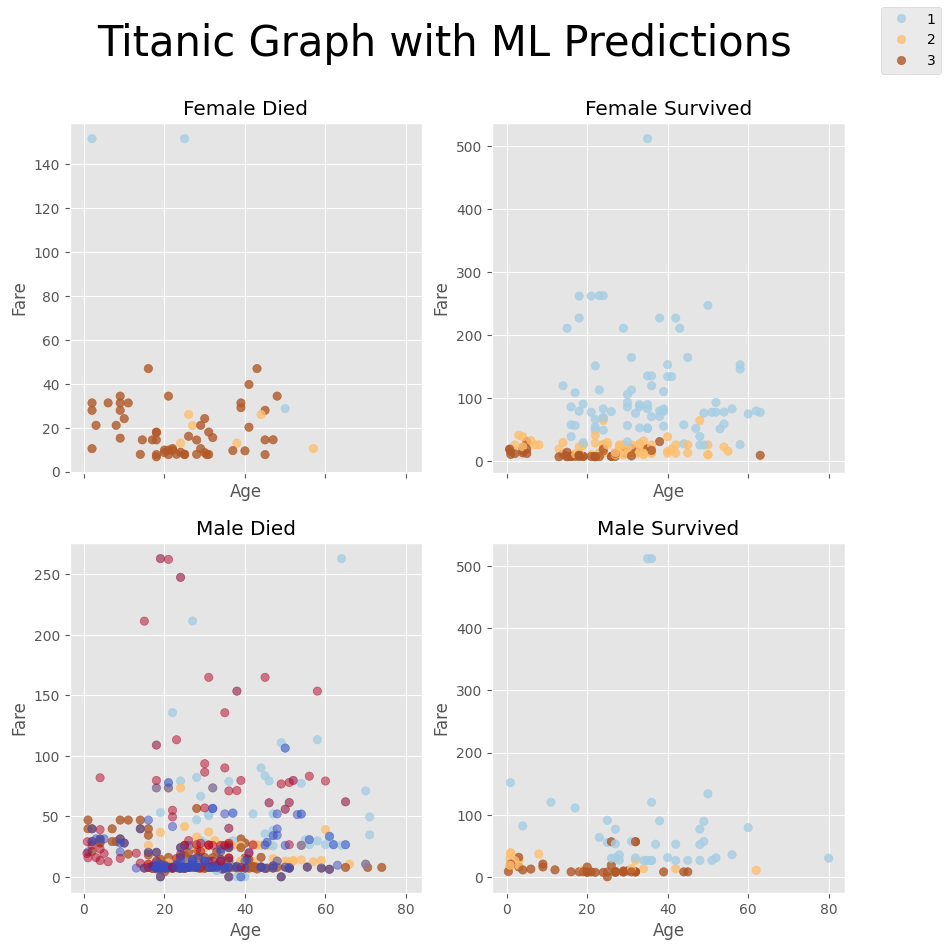

In [17]:
# Predict probabilities for the test set
test_data = x_test.copy()
test_data['predicted_survived'] = model.predict(test_data)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(10, 10))

scatter_fs = ax1.scatter('age', 'fare', c='pclass', label='female', cmap='Paired', alpha=0.8,
                         data=female[female['survived'] == 0])
scatter_fd = ax2.scatter('age', 'fare', c='pclass', label='female', cmap='Paired', alpha=0.8,
                         data=female[female['survived'] == 1])
scatter_ms = ax3.scatter('age', 'fare', c='pclass', label='male', cmap='Paired', alpha=0.8,
                         data=male[male['survived'] == 0])
scatter_md = ax4.scatter('age', 'fare', c='pclass', label='male', cmap='Paired', alpha=0.8,
                         data=male[male['survived'] == 1])

# Add model's prediction to the plots
ax3.scatter(test_data['age'], test_data['fare'], c=test_data['predicted_survived'], cmap='coolwarm', alpha=0.5)

plt.suptitle('Titanic Graph with ML Predictions', fontsize=30)
ax1.set(xlabel='Age', ylabel='Fare', title='Female Died')
ax2.set(xlabel='Age', ylabel='Fare', title='Female Survived')
ax3.set(xlabel='Age', ylabel='Fare', title='Male Died')
ax4.set(xlabel='Age', ylabel='Fare', title='Male Survived')

fig.legend(*scatter_fs.legend_elements())
plt.show()
